In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [3]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/yearly/ats/2003'
df_files = os.listdir(path_to_test_csv_out)
df_list = [pd.read_csv(os.path.join(path_to_test_csv_out, f)) for f in df_files]

In [145]:
year_df = pd.concat(df_list, ignore_index=True)
year_df.shape

(506547, 4)

In [5]:
coords = year_df.as_matrix(columns=['lats', 'lons'])

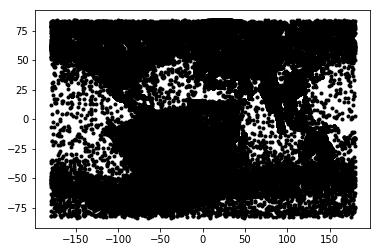

In [6]:
plt.plot(coords[:,1], coords[:,0], 'k.')
plt.show()

In [58]:
def myround2(x, dec=20, base=.000005):
    return np.round(base * np.round(x/base), dec)

In [165]:
resolution = 15./3600  # in arcseconds. 3600 arc seconds in a degree, and want nearest 15 arcseconds (~0.5km)

Round each lat and lon to nearest 15 arcseconds

In [147]:
year_df['lons'] = myround2(year_df['lons'].values, base=resolution)

In [146]:
year_df['lats'] = myround2(year_df['lats'].values, base=resolution)

In [148]:
lat_lon_tuples = zip(year_df.lats, year_df.lons)

In [149]:
unique_locations, indicies, unique_counts = np.unique(lat_lon_tuples, axis=0, return_inverse=True, return_counts=True)

In [152]:
year_df['cluster_labels'] = indicies
year_df['cluster_counts'] = unique_counts[indicies]

In [166]:
year_df = year_df[year_df['cluster_counts'] > 3]

In [167]:
grouped_df = year_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [168]:
grouped_df.shape

(3401, 3)

In [169]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

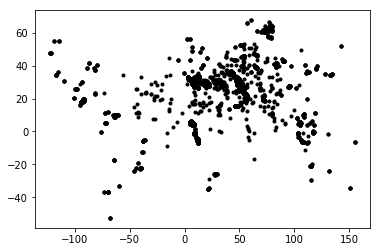

In [170]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'k.')
plt.show()